# Importing libraries and data file

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm, gamma, lognorm, weibull_min
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing data
#renamed data file to avoid errors
df = pd.read_excel("Datasheet23.xlsx")

In [3]:
#automated year calculation

Year = math.floor(len(df)/365)

# Basic Statistics

In [4]:
#calculating missing data percentage
percentage = df.isnull().sum()*100/len(df)

#storing and presenting data
df2 = pd.DataFrame({'Column':df.columns,
                    'Percentage_missing':percentage})
df2.index = np.arange(0,len(df2))
print(df2.head())

  Column  Percentage_missing
0   year            0.000000
1  month            0.000000
2   date            0.000000
3  HRF01            5.804584
4  HRF02            5.804584


In [5]:
#basic statistics
#slicing rainfall data into temporary df
tdf = df.iloc[:,3:27]

#calculating and presenting data
df3 = pd.DataFrame({'Mean':tdf.mean(),'Variance':tdf.var(),
                    'Standard Deviation':tdf.std(),'Skewness':tdf.skew()})

print(df3.head())

           Mean  Variance  Standard Deviation   Skewness
HRF01  0.173690  3.429886            1.851995  20.713407
HRF02  0.117299  1.249937            1.118006  17.906205
HRF03  0.096454  1.297860            1.139237  33.127875
HRF04  0.085093  1.007114            1.003551  23.465481
HRF05  0.066705  1.031618            1.015686  33.079139


# Time Series

In [6]:
#summing 24 hour data
df['daily']= df[df.columns[3:28]].sum(axis=1)

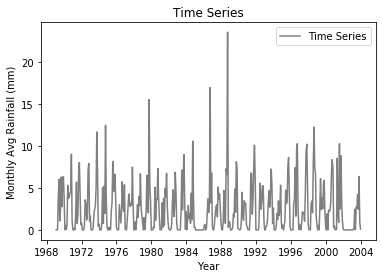

In [7]:
#calculating monthly rainfall
#to get clean series average data is taken
m_rain = list()
mx_rain = list()
for i in range(Year):
    for j in range(12):
        data = df[(df['year']==1969+i) & (df['month']==j+1)]
        m_rain.append(data['daily'].mean())
        mx_rain.append(data['daily'].max())

#generating time data
dt = pd.date_range('1969-01',periods=Year*12,freq="M")

#creating monthly rainfall df
mrdf = pd.DataFrame({'Avg Monthly Rainfall':m_rain,
                     'Max Rainfall':mx_rain}).set_index(dt)

#visualizing the data
#monthly maximum rainfall
# print(mrdf.head())
#time series
plt.plot(mrdf.index,mrdf['Avg Monthly Rainfall'],
         label='Time Series',color='grey')
plt.xlabel('Year')
plt.ylabel('Monthly Avg Rainfall (mm)')
plt.title('Time Series')
plt.legend()
plt.show()

# Annual Maxima at an Hourly Scale

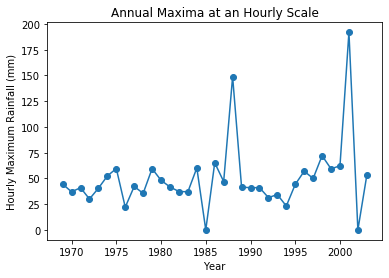

In [8]:
#creating hourly maximum list

hmax = list()

#iterating for 
for i in range(Year):
        data = df[df['year']==1969+i]
        hmax.append(data.iloc[:,3:27].max().max())
        
#storing data to dataframe
df_hmx = pd.DataFrame({'Year':np.arange(Year)+1969,'Hourly Annual Maximum':hmax})
df_hmx.fillna(0, inplace=True)
#plotting annual maximum series at an hourly rate
plt.scatter(df_hmx['Year'],df_hmx['Hourly Annual Maximum'])
plt.plot(df_hmx['Year'],df_hmx['Hourly Annual Maximum'])
plt.xlabel('Year')
plt.ylabel('Hourly Maximum Rainfall (mm)')
plt.title('Annual Maxima at an Hourly Scale')
plt.show()

# Three hours aggregate

In [9]:
#generating datetime
ndt = pd.date_range('1969-01',periods=len(df),freq="D")

#generating data
df_3 = pd.DataFrame({
                    'HRF 1-3':tdf[tdf.columns[0:3]].sum(axis=1),
                    'HRF 4-6':tdf[tdf.columns[3:6]].sum(axis=1),
                    'HRF 7-9':tdf[tdf.columns[6:9]].sum(axis=1),
                    'HRF 10-12':tdf[tdf.columns[9:12]].sum(axis=1),
                    'HRF 13-15':tdf[tdf.columns[12:15]].sum(axis=1),
                    'HRF 16-18':tdf[tdf.columns[15:18]].sum(axis=1),
                    'HRF 19-21':tdf[tdf.columns[18:21]].sum(axis=1),
                    'HRF 22-24':tdf[tdf.columns[21:24]].sum(axis=1)
                   }).set_index(ndt)

df_3s = pd.DataFrame({
                    'Mean':df_3.mean(),'Variance':df_3.var(),
                    'Standard Deviation':df_3.std(),
                    'Skewness':df_3.skew()
                     })
print(df_3s.head())

               Mean  Variance  Standard Deviation   Skewness
HRF 1-3    0.364953  9.223735            3.037060  16.079898
HRF 4-6    0.185786  4.027416            2.006842  22.896108
HRF 7-9    0.087695  6.100039            2.469826  94.196552
HRF 10-12  0.093327  6.010737            2.451680  62.257462
HRF 13-15  0.175632  2.477118            1.573886  17.899216


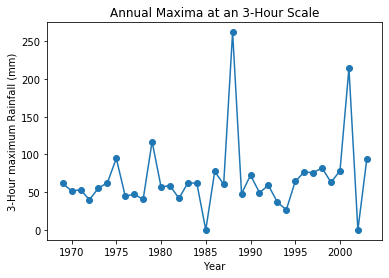

In [10]:
#creating hourly maximum list

h3max = list()

#iterating for 
for i in range(Year):
        data = df_3.loc[str(1969+i)]
        h3max.append(data.max(axis=1).max())

#storing data to dataframe
df_h3mx = pd.DataFrame({'Year':np.arange(Year)+1969,'3-Hour Maximum':h3max})

#plotting annual maximum series at an hourly rate
plt.scatter(df_h3mx['Year'],df_h3mx['3-Hour Maximum'])
plt.plot(df_h3mx['Year'],df_h3mx['3-Hour Maximum'])
plt.xlabel('Year')
plt.ylabel('3-Hour maximum Rainfall (mm)')
plt.title('Annual Maxima at an 3-Hour Scale')
plt.show()

# Six hours aggregate

In [11]:
df_6 = pd.DataFrame({
                    'HRF 1-6':df_3[df_3.columns[1:3]].sum(axis=1),
                    'HRF 7-12':df_3[df_3.columns[3:5]].sum(axis=1),
                    'HRF 13-18':df_3[df_3.columns[5:7]].sum(axis=1),
                    'HRF 19-24':df_3[df_3.columns[7:9]].sum(axis=1)
                    }).set_index(ndt)
df_6s = pd.DataFrame({
                    'Mean':df_6.mean(),'Variance':df_6.var(),
                    'Standard Deviation':df_6.std(),
                    'Skewness':df_6.skew()
                     })
print(df_6s.head())

               Mean   Variance  Standard Deviation   Skewness
HRF 1-6    0.273480  12.770013            3.573516  50.840945
HRF 7-12   0.268959  10.234233            3.199099  36.855111
HRF 13-18  1.088399  21.231506            4.607766   7.587529
HRF 19-24  0.527466  12.711528            3.565323  12.757973


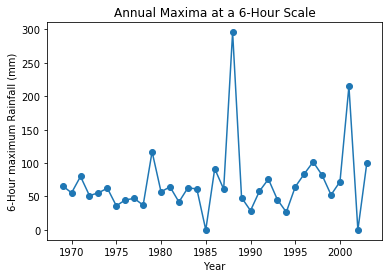

In [12]:
#creating 6-hourly maximum list

h6max = list()

#iterating
for i in range(Year):
        data = df_6.loc[str(1969+i)]
        h6max.append(data.max(axis=1).max())

#storing data to dataframe
df_h6mx = pd.DataFrame({'Year':np.arange(Year)+1969,'6-Hour Maximum':h6max})

#plotting annual maximum series at an hourly rate
plt.scatter(df_h6mx['Year'],df_h6mx['6-Hour Maximum'])
plt.plot(df_h6mx['Year'],df_h6mx['6-Hour Maximum'])
plt.xlabel('Year')
plt.ylabel('6-Hour maximum Rainfall (mm)')
plt.title('Annual Maxima at a 6-Hour Scale')
plt.show()

# Twelve hours aggregate

In [13]:
df_12 = pd.DataFrame({
                    'HRF 1-12':df_6[df_6.columns[1:3]].sum(axis=1),
                    'HRF 13-24':df_6[df_6.columns[3:5]].sum(axis=1),
                    }).set_index(ndt)
df_12s = pd.DataFrame({
                    'Mean':df_12.mean(),'Variance':df_12.var(),
                    'Standard Deviation':df_12.std(),
                    'Skewness':df_12.skew()
                     })
print(df_12s)

               Mean   Variance  Standard Deviation   Skewness
HRF 1-12   1.357357  33.155366            5.758070  10.645282
HRF 13-24  0.527466  12.711528            3.565323  12.757973


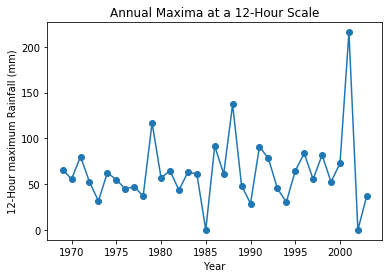

In [14]:
#creating 12-hourly maximum list

h12max = list()

#iterating
for i in range(Year):
        data = df_12.loc[str(1969+i)]
        h12max.append(data.max(axis=1).max())

#storing data to dataframe
df_h12mx = pd.DataFrame({'Year':np.arange(Year)+1969,'12-Hour Maximum':h12max})

#plotting annual maximum series at an hourly rate
plt.scatter(df_h12mx['Year'],df_h12mx['12-Hour Maximum'])
plt.plot(df_h12mx['Year'],df_h12mx['12-Hour Maximum'])
plt.xlabel('Year')
plt.ylabel('12-Hour maximum Rainfall (mm)')
plt.title('Annual Maxima at a 12-Hour Scale')
plt.show()

In [15]:
t_7d = list()
for i in range(math.floor(len(df)/7)):
    t_7d.append(df.iloc[0+7*i:7+7*i,27].sum())

days = np.arange(0,len(t_7d))
df_7d = pd.DataFrame({'Days':days,'Total Rainfall':t_7d})
print(df_7d.head())

   Days  Total Rainfall
0     0             0.0
1     1             0.0
2     2             0.0
3     3             0.0
4     4             0.0


# 15 days aggregate

In [16]:
t_15d = list()
for i in range(852):
    t_15d.append(df.iloc[0+15*i:15+15*i,27].sum())
days = np.arange(0,852)*15

df_15d = pd.DataFrame({'Days':days,'Total Rainfall':t_15d})
print(df_15d.head())

   Days  Total Rainfall
0     0             0.0
1    15             0.0
2    30             0.0
3    45             0.0
4    60             0.0


# Maximum rainfall daily scale 

Year              1988.0
Annual Maximum     432.8
Name: 19, dtype: float64


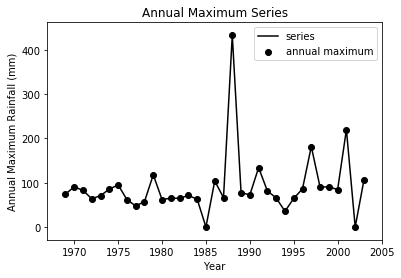

In [17]:
an_mx = list()
for i in range(35):
    an_mx.append(df[df['year']==1969+i].iloc[:,27].max())

df_anmx = pd.DataFrame({'Year':np.arange(35)+1969,'Annual Maximum':an_mx})

#printing highest rainfall

print(df_anmx.loc[df_anmx.iloc[:,1].idxmax()])

#plotting annual maximum series
plt.plot(df_anmx['Year'],df_anmx['Annual Maximum'],color='black',label='series')
plt.scatter(df_anmx['Year'],df_anmx['Annual Maximum'],color='black',label='annual maximum')
plt.title('Annual Maximum Series')
plt.xlabel("Year")
plt.ylabel("Annual Maximum Rainfall (mm)")
plt.legend()
plt.show()

# Fitting distribution to hourly max data

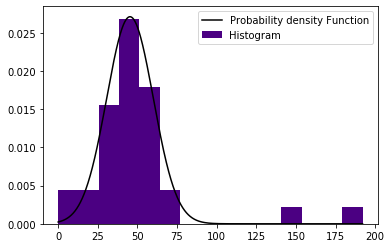

In [18]:
#Creating histogram
hist, bin_edges = np.histogram(df_hmx.iloc[:,1],
                               bins='auto', density=True)

# Calculating bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Define a function to fit
def fit_function(x, *params):
    return norm.pdf(x, *params)

# Fit the distribution to the data
initial_params = [df_hmx.iloc[:,1].mean(), 
                  df_hmx.iloc[:,1].std()]
params, covariance = curve_fit(fit_function, bin_centers,
                               hist, p0=initial_params)

# Plot the histogram
plt.hist(df_hmx.iloc[:,1], bins='auto',density= True, color='indigo',label='Histogram')

# Plot the fitted distribution
x_range = np.linspace(min(df_hmx.iloc[:,1]),
                      max(df_hmx.iloc[:,1]), 1000)
plt.plot(x_range, fit_function(x_range, *params),
         color='black',
         label='Probability density Function')
plt.legend()
plt.show()

# IDF Curve

the peak rainfall is calculated using following equation
Pt=P24(t/24)^(1/3)

In [19]:
#calculating peak rainfall at minute interval
IDF = df_hmx
for i in range(12):
    i = 5 + i*5
    IDF[str(i)+" minute"] = IDF['Hourly Annual Maximum']*np.power((i/1440),1/3)
#calculating mean and std dev.   
mean, std = IDF.iloc[:,2:].mean(),IDF.iloc[:,2:].mean()

In [20]:
#dataframe of Constants
pk_df = pd.DataFrame({'Time':[2,5,10,25,50,100],
                      'K':[-0.164,0.719,1.305,2.04,2.592,3.137]
                     })

In [21]:
#iterating peak rainfall
a=0
for i in range(12):
    a = 5 + i*5
    #calculating peak rainfall
    pk_df[str(a)+"min peak"] = mean[i]+ pk_df['K']*std[i]

In [22]:
#iterating rainfall intensity
a=0
for i in range(12):
    a = 5 + i*5
    #creating intensity data
    pk_df[str(a)+"min int"] = pk_df.iloc[:,2+i]/(a/60)

In [23]:
pk_df = pk_df.transpose()


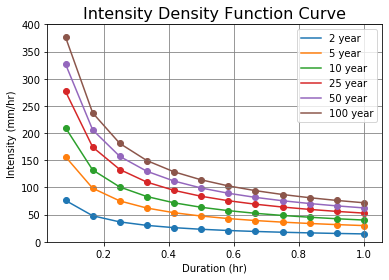

In [26]:
#plotting
curve_time = np.arange(5,65,5)/60
for i in range(6):
    plt.scatter(curve_time,pk_df.iloc[14:,i].transpose())
    plt.plot(curve_time,pk_df.iloc[14:,i].transpose(),
             label=str(int(pk_df.iloc[0,i]))+ " year")

plt.ylim(0,400)
plt.legend()
plt.xlabel("Duration (hr)")
plt.ylabel("Intensity (mm/hr)")
plt.title("Intensity Density Function Curve",fontsize=16)
plt.grid(color='grey')
plt.savefig("int.png")
plt.show()

In [25]:
#pk_df is transposed for better visuals
pk_df

,0,1,2,3,4,5
Time,2.000000,5.000000,10.000000,25.000000,50.000000,100.000000
K,-0.164000,0.719000,1.305000,2.040000,2.592000,3.137000
5min peak,6.338317,13.032976,17.475863,23.048427,27.233536,31.365573
10min peak,7.985779,16.420520,22.018208,29.039198,34.312105,39.518146
15min peak,9.141436,18.796803,25.204556,33.241584,39.277555,45.236984
20min peak,10.061452,20.688559,27.741203,36.587097,43.230544,49.789743
25min peak,10.838370,22.286075,29.883306,39.412255,46.568691,53.634375
30min peak,11.517487,23.682488,31.755751,41.881771,49.486619,56.995029
35min peak,12.124765,24.931185,33.430123,44.090054,52.095880,60.000183
40min peak,12.676635,26.065951,34.951726,46.096854,54.467072,62.731146
